# Linear basis expansion regression & kernel regression

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 6)

### Artificial data creation

We prepare data according to model $Y = f(x) + \varepsilon$, where:
* $f(x)$ is some "unknown" function,
* $\varepsilon$ is a random variable with a zero mean normal distribution.

Therefore, $\mathrm E Y = f(x)$.

Shape of X: (100, 1)


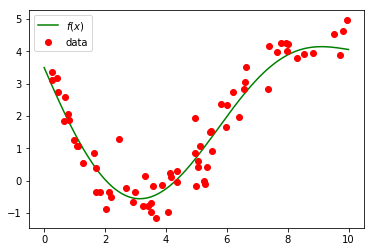

In [2]:
# unknown function
def fun(x):
    y = 1 + 0.1*(x-5)**2 - 2*np.sin(x*0.6)
    return y

# number observations
n = 100

# set seed to fix randomnes
np.random.seed(2)

# create simple dataset with only one feature
x = np.random.rand(n)*10
Y = fun(x) + np.random.randn(n)*0.5

# reshape to proper design matrix
X = x.reshape((-1,1))
print("Shape of X:", X.shape)

# split to training and testing samples
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

# x values for plot purposes
x_ = np.linspace(0, 10, 200)
X_ = x_.reshape((-1,1))

# plot
plt.plot(x_, fun(x_), 'g-', label=u'$f(x)$')
plt.plot(Xtrain[:,0], Ytrain, 'ro',label='data')
plt.legend()

### Task 1 - linear regression

Perform linear regression in the original feature space $\mathbb R^1$.

* Use the class [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) from `scikit-learn`.
* Plot the results.
* On the test set, plot $Y_i$ against predictions $\hat Y(x_i)$.
* Calculate the mean squared error on the test set. Use the class [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

**Note:** Of course we expect bad results.

2.251573761949738


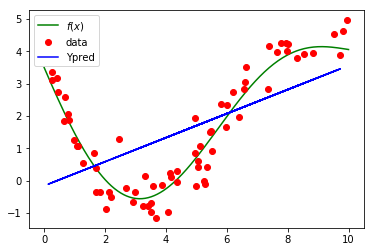

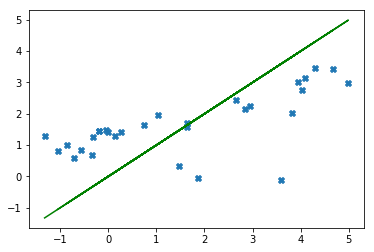

In [45]:
### Your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(Xtrain, Ytrain)

print(mean_squared_error(Ytest, reg.predict(Xtest)))
# plot
plt.plot(x_, fun(x_), 'g-', label=u'$f(x)$')
plt.plot(Xtrain[:,0], Ytrain, 'ro',label='data')
plt.plot(Xtest[:,0], reg.predict(Xtest), 'b',label='Ypred')
plt.legend()


Ylrhat = reg.predict(Xtest)

plt.figure()
plt.scatter(Ytest, Ylrhat, marker='X')
plt.plot(Ytest, Ytest, color='green')
plt.show()

### Task 2 - linear basis expansion
Use linear basis expansion model with basis functions $\varphi_{k+1}(x) = x^k$ for $k = 0, \dotsc, M-1$.
This coresponds to the feature transformation into a space $\mathbb R^M$.

In a new feature space perform ridge regression.

* Use the class [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) from `scikit-learn`.
* Plot the results.
* On the test set, plot $Y_i$ against predictions $\hat Y(x_i)$.
* Calculate the mean squared error on the test set.

**Note:** We should get much better results

[[1.00000000e+00 5.29142094e+00 2.79991356e+01 1.48155212e+02
  7.83951594e+02]
 [1.00000000e+00 7.76559185e+00 6.03044168e+01 4.68299487e+02
  3.63662268e+03]
 [1.00000000e+00 4.14905837e+00 1.72146854e+01 7.14247346e+01
  2.96345393e+02]
 [1.00000000e+00 2.20306207e+00 4.85348249e+00 1.06925232e+01
  2.35562923e+01]
 [1.00000000e+00 6.57512388e+00 4.32322540e+01 2.84257425e+02
  1.86902779e+03]]
0.45923738420927457


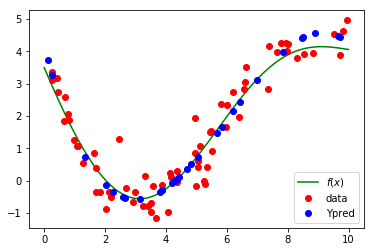

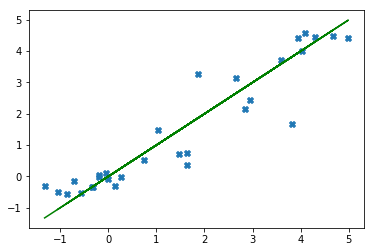

In [72]:
from sklearn.linear_model import Ridge
# feature mapping
def vphi(X, M):
    result = np.zeros((X.shape[0], M))
    for k in range(0, M):
        result[:,k] = X[:, 0]**k
    return result
      
M = 5
# Compute design matrices in a new feature space
Ptrain = vphi(Xtrain,M)
Ptest = vphi(Xtest,M)

print(Ptrain[0:5,:])
# continue ....
rr = Ridge(alpha = 0.05, fit_intercept=True)
rr.fit(Ptrain, Ytrain)

print(mean_squared_error(Ytest, rr.predict(Ptest)))
# plot
plt.plot(x_, fun(x_), 'g-', label=u'$f(x)$')
plt.plot(Xtrain[:,0], Ytrain, 'ro',label='data')
plt.plot(Xtest[:,0], rr.predict(Ptest), 'bo',label='Ypred')
plt.legend()


Ylrhat = rr.predict(Ptest)

plt.figure()
plt.scatter(Ytest, Ylrhat, marker='X')
plt.plot(Ytest, Ytest, color='green')
plt.show()

### Task 3 - Kernel regression
Use kernel regression with various kernels (linear, polynomial, RBF).

* Use the class [KernelRidge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge) from `scikit-learn`.
* Plot the results.
* On the test set, plot $Y_i$ against predictions $\hat Y(x_i)$.
* Calculate the mean squared error on the test set.

In [100]:
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step

In [103]:
### Your code here
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge(alpha=0.01, kernel='rbf', gamma=0.04)
#kr = KernelRidge(alpha=0.01, kernel='polynomial', degree=5)
kr.fit(Xtrain, Ytrain)
best = 10000
bpar = None
print(mean_squared_error(Ytest, kr.predict(Xtest)))
for i in drange(0.001, 10, 0.005):
    for j in drange(0.001, 10, 0.005):
        kr = KernelRidge(alpha=i, kernel='rbf', gamma=j)
        kr.fit(Xtrain, Ytrain)
        tmp = mean_squared_error(Ytest, kr.predict(Xtest))
        if tmp < best:
            best = tmp
            bpar = (i, j)
            print(i, j, best)
# plot
plt.plot(x_, fun(x_), 'g-', label=u'$f(x)$')
plt.plot(Xtrain[:,0], Ytrain, 'ro',label='data')
plt.plot(Xtest[:,0], kr.predict(Xtest), 'bo',label='Ypred')
plt.legend()


Ylrhat = kr.predict(Xtest)

plt.figure()
plt.scatter(Ytest, Ylrhat, marker='X')
plt.plot(Ytest, Ytest, color='green')
plt.show()

0.4195069543578006
0.001 0.001 1.0953746661097807
0.001 0.006 0.4665727558692038
0.001 0.011 0.4404689950807866
0.001 0.016 0.4300930146046059
0.001 0.021 0.4250872637066943
0.001 0.026000000000000002 0.4250597861717367
0.006 0.026000000000000002 0.4235909409734272
0.006 0.031000000000000003 0.4207239422174885
0.006 0.036000000000000004 0.420528120525541
0.011 0.036000000000000004 0.4196547616721543
0.011 0.041 0.4193678824206968
0.016 0.041 0.41899118601327273
0.021 0.046 0.4186659588937286
0.026000000000000002 0.051 0.4186527844811912


KeyboardInterrupt: 